In [40]:
using JuMP, Clp, Plots, CSV, DataFrames

In [58]:
itsa4 = CSV.read("itsa4.csv", DataFrame)
itsa4p = parse.(Float64,replace.(itsa4[!,:VARIAÇÃO],","=>"."))

mglu3 = CSV.read("mglu3.csv", DataFrame)
mglu3p = parse.(Float64,replace.(mglu3[!,:VARIAÇÃO],","=>"."))

vale3 = CSV.read("vale3.csv", DataFrame)
vale3p = parse.(Float64,replace.(vale3[!,:VARIAÇÃO],","=>"."))

amer3 = CSV.read("amer3.csv", DataFrame)
amer3p = parse.(Float64,replace.(amer3[!,:VARIAÇÃO],","=>"."))

lwsa3 = CSV.read("lwsa3.csv", DataFrame)
lwsa3p = parse.(Float64,replace.(lwsa3[!,:VARIAÇÃO],","=>"."));

abev3 = CSV.read("abev3.csv", DataFrame)
abev3p = parse.(Float64,replace.(abev3[!,:VARIAÇÃO],","=>"."));

sapr4 = CSV.read("sapr4.csv", DataFrame)
sapr4p = parse.(Float64,replace.(sapr4[!,:VARIAÇÃO],","=>"."));

taee4 = CSV.read("taee4.csv", DataFrame)
taee4p = parse.(Float64,replace.(taee4[!,:VARIAÇÃO],","=>"."));

ggbr4 = CSV.read("ggbr4.csv", DataFrame)
ggbr4p = parse.(Float64,replace.(ggbr4[!,:VARIAÇÃO],","=>"."));

nrow(sapr4)

50

In [61]:
num_assets = 9
num_scenarios = 50
r = permutedims(hcat(reshape(itsa4p, 50),
                    reshape(mglu3p, 50),
                    reshape(vale3p, 50),
                    reshape(amer3p, 50),
                    reshape(lwsa3p, 50),
                    reshape(abev3p, 50),
                    reshape(sapr4p, 50),
                    reshape(taee4p, 50),
                    reshape(ggbr4p, 50)))
p = 1/num_scenarios
α = 0.9

0.9

=========== ω = 0.0 ===========
optimal solution = -0.0682
x = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
l = 2.6
Expected Value: -0.0682
CVAR: 2.6
=========== ω = 0.1 ===========
optimal solution = 0.15722000000000003
x = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
l = 1.7599999999999996
Expected Value: -0.0682
CVAR: 2.186
=========== ω = 0.2 ===========
optimal solution = 0.37223003535774024
x = [0.10274602341567902, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5814208592901389, 0.30553692631694335, 0.010296190977238702]
l = 1.540656626295117
Expected Value: 0.0056884468092860685
CVAR: 1.8383963895515563
=========== ω = 0.3 ===========
optimal solution = 0.5555008296319671
x = [0.10274602341567902, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5814208592901389, 0.30553692631694335, 0.010296190977238702]
l = 1.540656626295117
Expected Value: 0.0056884468092860685
CVAR: 1.8383963895515563
=========== ω = 0.4 ===========
optimal solution = 0.7387716239061943
x = [0.10274602341567902, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5814208

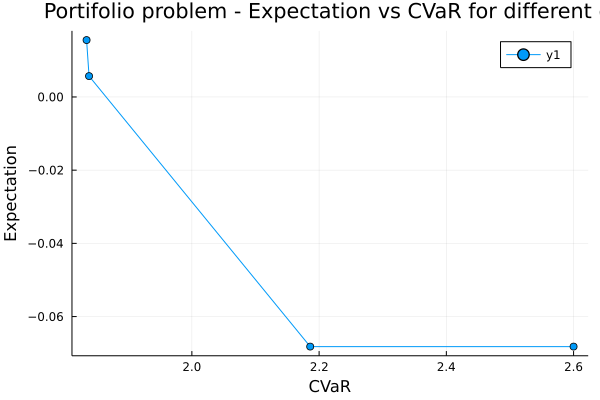

In [92]:
cvar_list = []
expected_value_dict = Dict{Float64, Float64}();
for ω in 0.0:0.1:1.0
    
    model_Portifolio = Model(Clp.Optimizer)
    set_optimizer_attribute(model_Portifolio, "LogLevel",0)

    @variables(model_Portifolio,
    begin
        x[1:num_assets] ≥ 0
        l ≥ 0
        θ[1:num_scenarios] ≥ 0
    end)

    @constraints(model_Portifolio,
    begin
        ct1, sum(x[i] for i = 1:num_assets) == 1
        ct2[s=1:num_scenarios], θ[s] ≥ sum(-r[i,s]*x[i] for i = 1:num_assets) - l
    end)

    @objective(model_Portifolio, Min, (1-ω)*sum(p*(sum(-r[i,s]*x[i] for i = 1:num_assets)) for s = 1:num_scenarios) + ω * (l + sum(p*θ[s]/(1-α) for s = 1:num_scenarios)))
    optimize!(model_Portifolio);
    
    cvar = value(l) + sum(p*value(θ[s])/(1-α) for s = 1:num_scenarios)
    exp_value = sum(p*(sum(-r[i,s]*value(x[i]) for i = 1:num_assets)) for s = 1:num_scenarios)
    
    append!(cvar_list,cvar)
    push!(expected_value_dict,cvar => exp_value)
    
    println("=========== ω = $(ω) ===========")
    println("optimal solution = $(objective_value(model_Portifolio))")
    println("x = $(value.(x))")
    println("l = $(value(l))")
#     println("θ = $(value.(θ))")
    println("Expected Value: $(exp_value)")
    println("CVAR: $(cvar)")
end
plot(x=cvar_list,expected_value_dict, shape = :circle,title = "Portifolio problem - Expectation vs CVaR for different ω", xlabel = "CVaR", ylabel = "Expectation")

=========== γ = 1.9 ===========
optimal solution = -0.007983459451196176
x = [0.10288160207903448, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6500229305205224, 0.24709546740044314, 0.0]
l = 1.618336008560727
θ = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1557479171443865, 0.0, 0.05865474279599403, 0.0, 0.0, 0.0, 0.0, 1.1394412596499293, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05447603760605277, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Expected Value: -0.007983459451196183
CVAR: 1.8999999999999995
=========== γ = 1.95 ===========
optimal solution = -0.018664368518943177
x = [0.08823154730056883, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7106932660704729, 0.20107518662895812, 0.0]
l = 1.6462475477082212
θ = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1415564727763768, 0.0, 0.13821727942113116, 0.0, 0.0, 0.0, 0.0, 1.0916629723050288, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

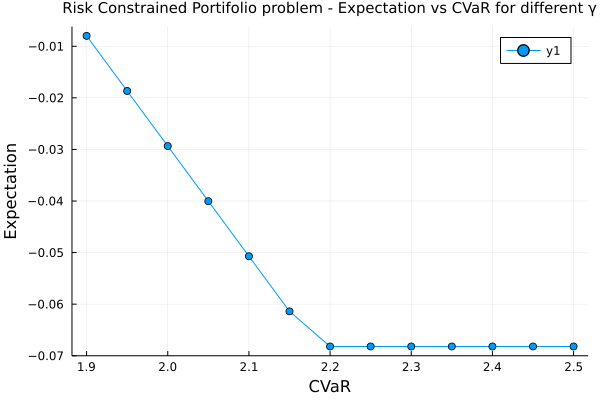

In [94]:
cvar_list = []
expected_value_dict = Dict{Float64, Float64}();
for γ in 1.9:0.05:2.5
    
    model_Portifolio = Model(Clp.Optimizer)
    set_optimizer_attribute(model_Portifolio, "LogLevel",0)

    @variables(model_Portifolio,
    begin
        x[1:num_assets] ≥ 0
        l ≥ 0
        θ[1:num_scenarios] ≥ 0
    end)

    @constraints(model_Portifolio,
    begin
        ct1, sum(x[i] for i = 1:num_assets) == 1
        ct2[s=1:num_scenarios], θ[s] ≥ sum(-r[i,s]*x[i] for i = 1:num_assets) - l
        ct3, l + sum(p*θ[s] for s = 1:num_scenarios)/(1-α) ≤ γ
    end)

    @objective(model_Portifolio, Min, sum(p*(sum(-r[i,s]*x[i] for i = 1:num_assets)) for s = 1:num_scenarios))
    optimize!(model_Portifolio);
    
    cvar = value(l) + sum(p*value(θ[s])/(1-α) for s = 1:num_scenarios)
    exp_value = sum(p*(sum(-r[i,s]*value(x[i]) for i = 1:num_assets)) for s = 1:num_scenarios)
    
    append!(cvar_list,cvar)
    push!(expected_value_dict,cvar => exp_value)
    
    println("=========== γ = $(γ) ===========")
    println("optimal solution = $(objective_value(model_Portifolio))")
    println("x = $(value.(x))")
    println("l = $(value(l))")
    println("θ = $(value.(θ))")
    println("Expected Value: $(exp_value)")
    println("CVAR: $(cvar)")
end

plot(x=cvar_list,expected_value_dict, shape = :circle,title = "Risk Constrained Portifolio problem - Expectation vs CVaR for different γ", xlabel = "CVaR", ylabel = "Expectation", titlefontsize = 10)